<a href="https://colab.research.google.com/github/norbertparti/traffic_sign_recognition/blob/main/traffic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import glob
import cv2
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Folder check

In [ ]:
!ls /content/drive/MyDrive/Colab_Notebooks/traffic_sign_recognition/data

speedlimit-20  stop


In [ ]:
root = "/content/drive/MyDrive/Colab_Notebooks/traffic_sign_recognition/data"
images = glob.glob(f"{root}/**/*.ppm")
images[:5]

['/content/drive/MyDrive/Colab_Notebooks/traffic_sign_recognition/data/stop/00000_00000.ppm',
 '/content/drive/MyDrive/Colab_Notebooks/traffic_sign_recognition/data/stop/00000_00020.ppm',
 '/content/drive/MyDrive/Colab_Notebooks/traffic_sign_recognition/data/stop/00000_00019.ppm',
 '/content/drive/MyDrive/Colab_Notebooks/traffic_sign_recognition/data/stop/00000_00018.ppm',
 '/content/drive/MyDrive/Colab_Notebooks/traffic_sign_recognition/data/stop/00000_00017.ppm']

In [ ]:
#for image_path in images:
#  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#  resized = cv2.resize(img, (64,64),interpolation = cv2.INTER_AREA)
#  new_path = image_path.replace("data", "data_png").replace(".ppm", ".png")
#  cv2.imwrite(new_path, resized)

In [ ]:
png_root = "/content/drive/MyDrive/Colab_Notebooks/traffic_sign_recognition/data_png"
png_images = glob.glob(f"{png_root}/**/*.png")
png_images[:5]

['/content/drive/MyDrive/Colab_Notebooks/traffic_sign_recognition/data_png/speedlimit-20/00000_00020.png',
 '/content/drive/MyDrive/Colab_Notebooks/traffic_sign_recognition/data_png/speedlimit-20/00000_00015.png',
 '/content/drive/MyDrive/Colab_Notebooks/traffic_sign_recognition/data_png/speedlimit-20/00000_00011.png',
 '/content/drive/MyDrive/Colab_Notebooks/traffic_sign_recognition/data_png/speedlimit-20/00000_00019.png',
 '/content/drive/MyDrive/Colab_Notebooks/traffic_sign_recognition/data_png/speedlimit-20/00000_00016.png']

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  png_root,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(64, 64),
  batch_size=6)

Found 42 files belonging to 2 classes.
Using 34 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  png_root,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(64, 64),
  batch_size=6)

Found 42 files belonging to 2 classes.
Using 8 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['speedlimit-20', 'stop']


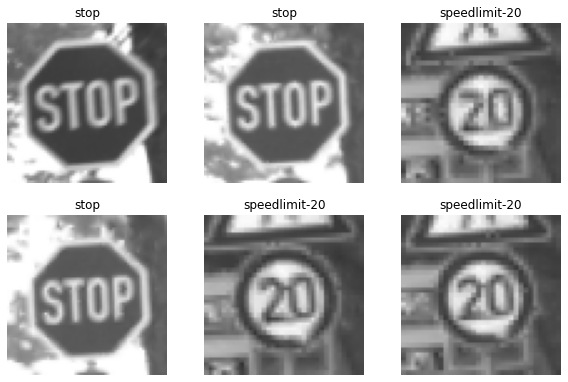

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.21176472 0.9960785


In [ ]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(64, 64, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
6/6 [==============================] - 1s 71ms/step - loss: 0.6428 - accuracy: 0.6638 - val_loss: 0.3848 - val_accuracy: 0.8750
Epoch 2/10
6/6 [==============================] - 0s 35ms/step - loss: 0.5127 - accuracy: 0.6292 - val_loss: 0.2170 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 35ms/step - loss: 0.2346 - accuracy: 1.0000 - val_loss: 0.0449 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 34ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 33ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.6379e-04 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 34ms/step - loss: 1.3819e-04 - accuracy: 1.0000 - val_loss: 6.2080e-05 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 34ms/step - loss: 1.4257e-04 - accuracy: 1.0000 - val_loss: 3.7576e-05 - val_accuracy: 1.0000
Epoch 8

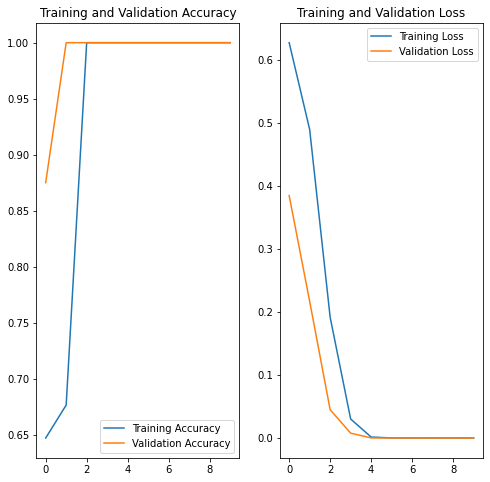

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
speedlimit_url = "/content/drive/MyDrive/Colab_Notebooks/traffic_sign_recognition/data_png/speedlimit-20/00000_00020.png"

img = keras.preprocessing.image.load_img(
    speedlimit_url, target_size=(64, 64)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to speedlimit-20 with a 100.00 percent confidence.
